In [38]:
import pandas as pd
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import seaborn as sns
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pyfiglet import Figlet

In [39]:
# Create a ParquetDataset object pointing to the Parquet catalog
dataset = pq.ParquetDataset('/home/jovyan/notebooks/Projekt/data/', filesystem=None)
#dataset = '/home/jovyan/notebooks/Projekt/data/'
#df = pd.read_parquet(dataset + '*.parquet')

pandas_df = dataset.read().to_pandas()

#print(pandas_df)

In [40]:
#PROBLEM BADAWCZY
#Prognoza przyszłych dochodów na podstawie wydatków i preferencji aktualnych klientów w celu zwiększenia rentowności firmy i monitorowania bieżących trendów.  

In [41]:
selected_columns_1 = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

descriptive_stats_1 = pandas_df[selected_columns_1].describe()

median_1 = pd.DataFrame(pandas_df[selected_columns_1].median(), columns=['median']).T
descriptive_stats_with_median_1 = pd.concat([descriptive_stats_1, median_1])

main_table_1 = tabulate(descriptive_stats_with_median_1, headers='keys', tablefmt='github')

print(main_table_1)


selected_columns_2 = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

descriptive_stats_2 = pandas_df[selected_columns_2].describe()

median_2 = pd.DataFrame(pandas_df[selected_columns_2].median(), columns=['median']).T
descriptive_stats_with_median_2 = pd.concat([descriptive_stats_2, median_2])

main_table_2 = tabulate(descriptive_stats_with_median_2, headers='keys', tablefmt='github')

print(main_table_2)


|        |   Income |    Kidhome |   Teenhome |   Recency |   MntWines |   MntFruits |   MntMeatProducts |   MntFishProducts |   MntSweetProducts |   MntGoldProds |
|--------|----------|------------|------------|-----------|------------|-------------|-------------------|-------------------|--------------------|----------------|
| count  |    266   | 266        | 266        |  266      |    266     |    266      |           266     |          266      |           266      |       266      |
| mean   |  52066.4 |   0.466165 |   0.484962 |   47.812  |    289.252 |     24.7857 |           170.741 |           38.2406 |            26.312  |        43.515  |
| std    |  22523.4 |   0.563666 |   0.557758 |   28.7895 |    324.421 |     39.3128 |           250.223 |           56.4897 |            39.4425 |        53.0317 |
| min    |   2447   |   0        |   0        |    0      |      0     |      0      |             1     |            0      |             0      |         0      |
| 25%    |

In [42]:
income_bins = [0, 30000, 70000, 1000000]  
labels = ['Low', 'Medium', 'High']  

pandas_df['Income_Category'] = pd.cut(pandas_df['Income'], bins=income_bins, labels=labels)

#print(pandas_df)

In [43]:
grouped_income_category = pandas_df.groupby('Income_Category')['ID'].count().reset_index()
#print(grouped_income_category)

grouped_income_category = grouped_income_category.rename(columns={"ID": "Count"})

income_category_table = tabulate(grouped_income_category, headers='keys', tablefmt='github')

print(income_category_table)

|    | Income_Category   |   Count |
|----|-------------------|---------|
|  0 | Low               |      46 |
|  1 | Medium            |     159 |
|  2 | High              |      61 |


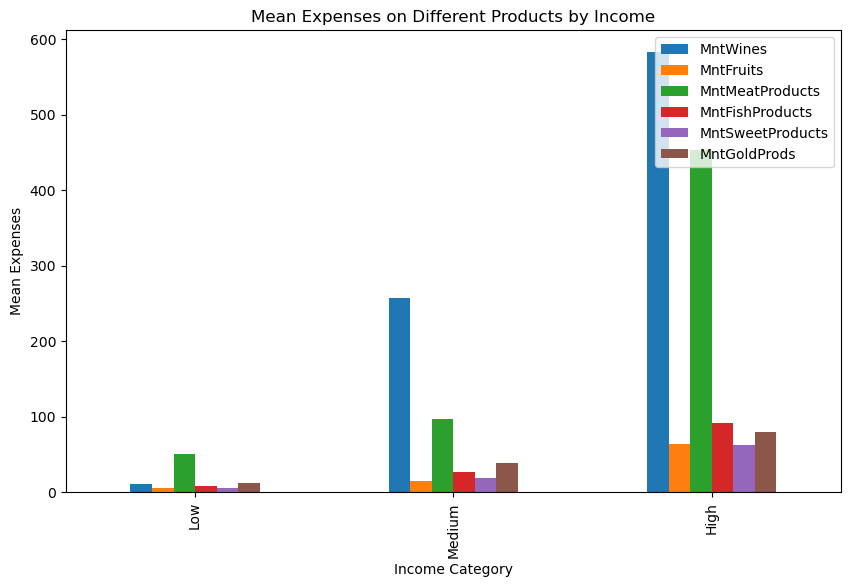

In [44]:
grouped_avg = pandas_df.groupby('Income_Category').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})

grouped_avg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Income Category')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses on Different Products by Income')
plt.legend(loc='upper right')
plt.show()

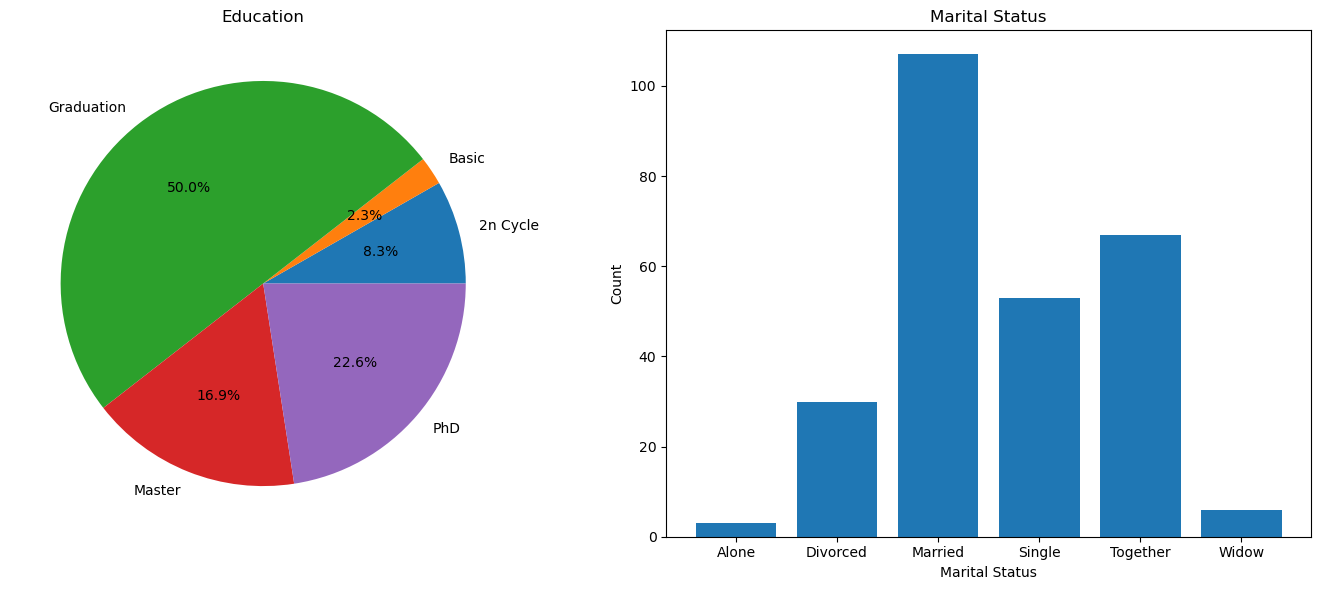

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(30, 15))

# Wykres kołowy
grouped_education = pandas_df.groupby('Education')['ID'].count()
axes[0].pie(grouped_education, labels=grouped_education.index, autopct='%1.1f%%')
axes[0].set_title('Education')

# Wykres słupkowy
grouped_marital_status = pandas_df.groupby('Marital_Status')['ID'].count()
axes[1].bar(grouped_marital_status.index, grouped_marital_status.values)
axes[1].set_title('Marital Status')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Count')

fig.set_size_inches(14, 6)

# Wyświetlanie wykresów
plt.tight_layout()
plt.show()

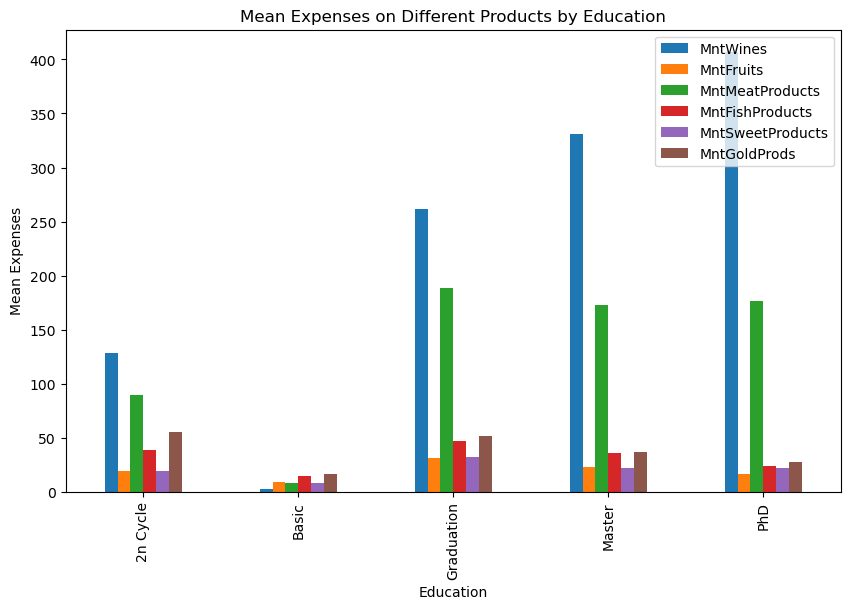

In [46]:
grouped_avg = pandas_df.groupby('Education').agg({
    'MntWines': 'mean',
    'MntFruits': 'mean',
    'MntMeatProducts': 'mean',
    'MntFishProducts': 'mean',
    'MntSweetProducts': 'mean',
    'MntGoldProds': 'mean'
})

grouped_avg.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Education')
plt.ylabel('Mean Expenses')
plt.title('Mean Expenses on Different Products by Education')
plt.legend(loc='upper right')
plt.show()

In [47]:
table = tabulate(grouped_avg, headers='keys', tablefmt='github')

print(table)

| Education   |   MntWines |   MntFruits |   MntMeatProducts |   MntFishProducts |   MntSweetProducts |   MntGoldProds |
|-------------|------------|-------------|-------------------|-------------------|--------------------|----------------|
| 2n Cycle    |  128.682   |    19.1364  |          89.8636  |           38.9091 |           19.3182  |        55.6364 |
| Basic       |    2.16667 |     8.66667 |           7.66667 |           15      |            7.66667 |        16.1667 |
| Graduation  |  261.526   |    30.8722  |         188.105   |           46.5414 |           31.8045  |        51.9398 |
| Master      |  330.8     |    23.1556  |         172.822   |           35.4889 |           21.5111  |        37.1556 |
| PhD         |  407.133   |    16.2     |         176.65    |           23.9833 |           22.1667  |        27.9    |


In [48]:
df_3 = pandas_df.drop(['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Income_Category'], axis=1)

education_group = df_3.groupby('Education').mean()[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]

table_2 = tabulate(education_group, headers='keys', tablefmt='github')

print(table_2)

| Education   |   NumDealsPurchases |   NumWebPurchases |   NumCatalogPurchases |   NumStorePurchases |
|-------------|---------------------|-------------------|-----------------------|---------------------|
| 2n Cycle    |             2.22727 |           3.45455 |              1.90909  |             4.59091 |
| Basic       |             1.5     |           1.66667 |              0.166667 |             3       |
| Graduation  |             2.33083 |           3.94737 |              2.80451  |             5.79699 |
| Master      |             2.31111 |           4.13333 |              2.71111  |             5.84444 |
| PhD         |             2.65    |           4.65    |              3.3      |             6.21667 |


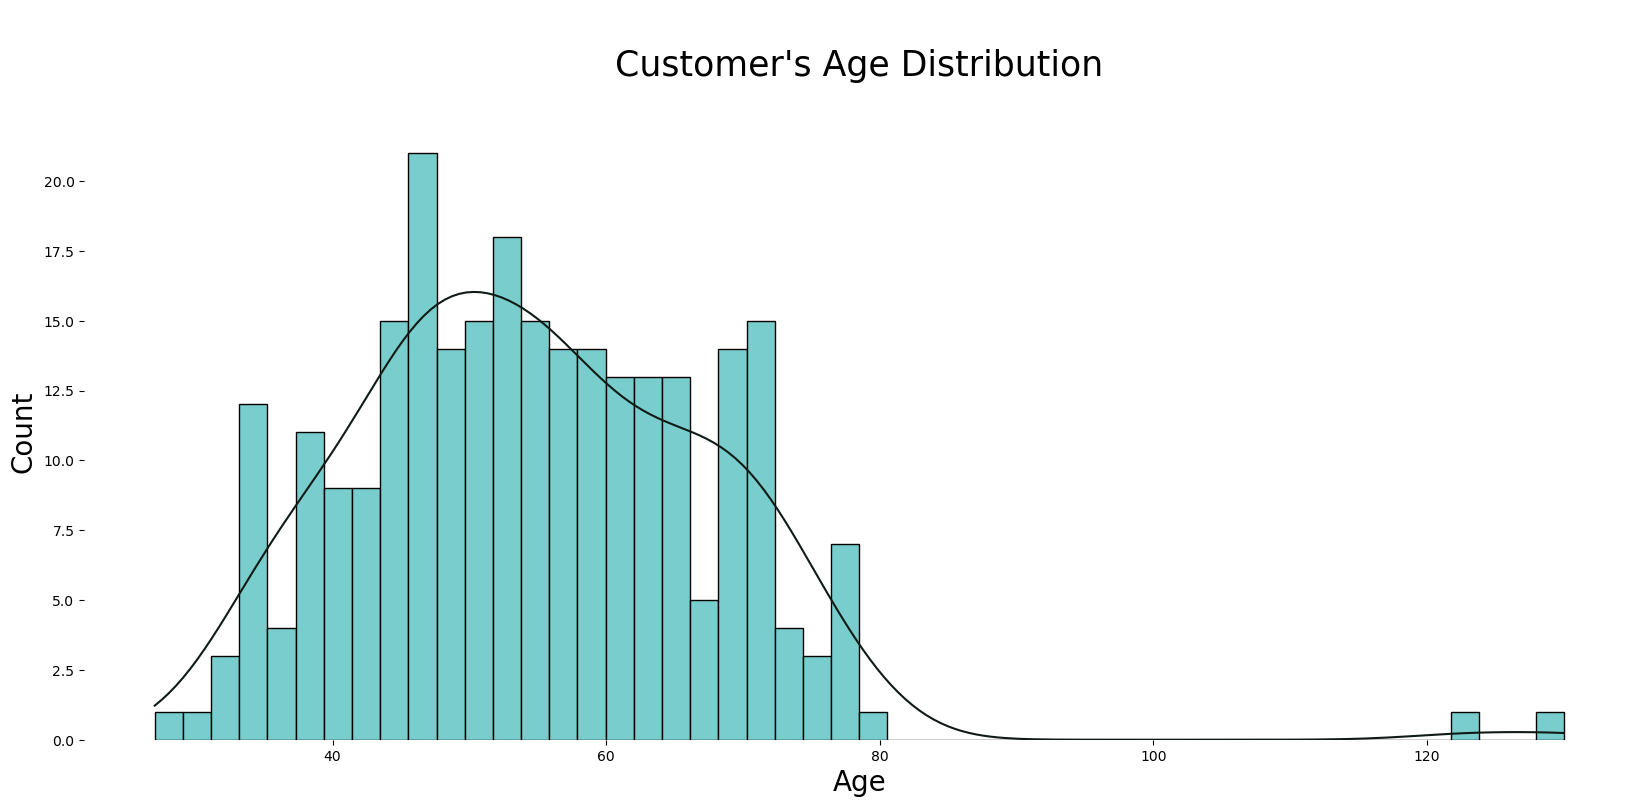

In [49]:
pandas_df["Age"] = datetime.now().year - pandas_df["Year_Birth"]
plt.subplots(figsize=(20, 8))
p = sns.histplot(pandas_df["Age"],color="#79CDCD",kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
p.axes.lines[0].set_color("#101B15")
p.axes.set_title("\nCustomer's Age Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("Age",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

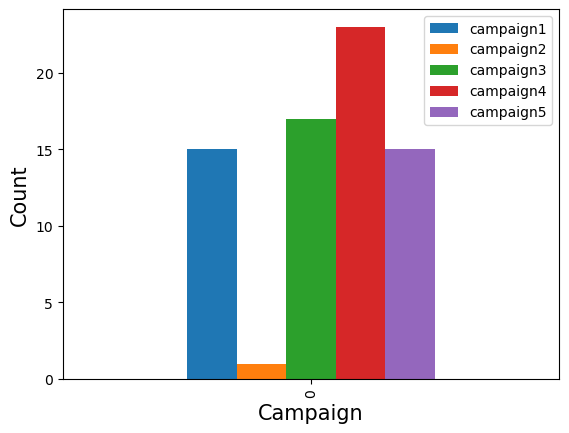

In [50]:
CampaignTotal = {
    'campaign1': [pandas_df['AcceptedCmp1'].sum()],
    'campaign2': [pandas_df['AcceptedCmp2'].sum()],
    'campaign3': [pandas_df['AcceptedCmp3'].sum()],
    'campaign4': [pandas_df['AcceptedCmp4'].sum()],
    'campaign5': [pandas_df['AcceptedCmp5'].sum()]
}
Campaigns = pd.DataFrame(CampaignTotal)

Campaigns.plot.bar()
plt.ylabel("Count",fontsize=15)
plt.xlabel("Campaign",fontsize=15)

plt.show()

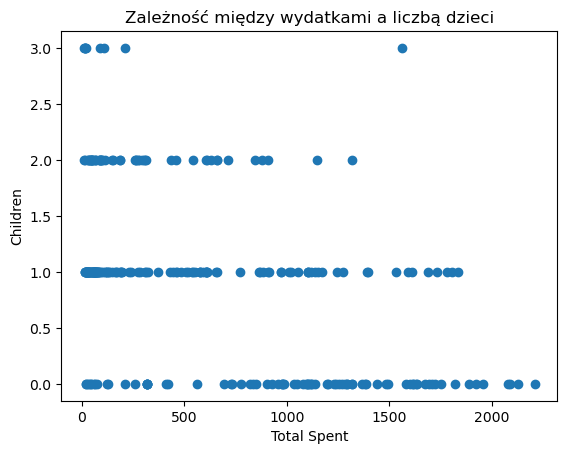

In [51]:
pandas_df_2=pandas_df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

pandas_df['Total_Spent'] = pandas_df_2['Wines'] + pandas_df_2['Fruits'] + pandas_df_2['Meat'] + pandas_df_2['Fish'] + pandas_df_2['Sweets'] + pandas_df_2['Gold']

pandas_df["Children"]=pandas_df["Kidhome"]+pandas_df["Teenhome"]

import matplotlib.pyplot as plt

plt.scatter(pandas_df['Total_Spent'], pandas_df['Children'])

plt.xlabel('Total Spent')
plt.ylabel('Children')

plt.title('Zależność między wydatkami a liczbą dzieci')

plt.show()

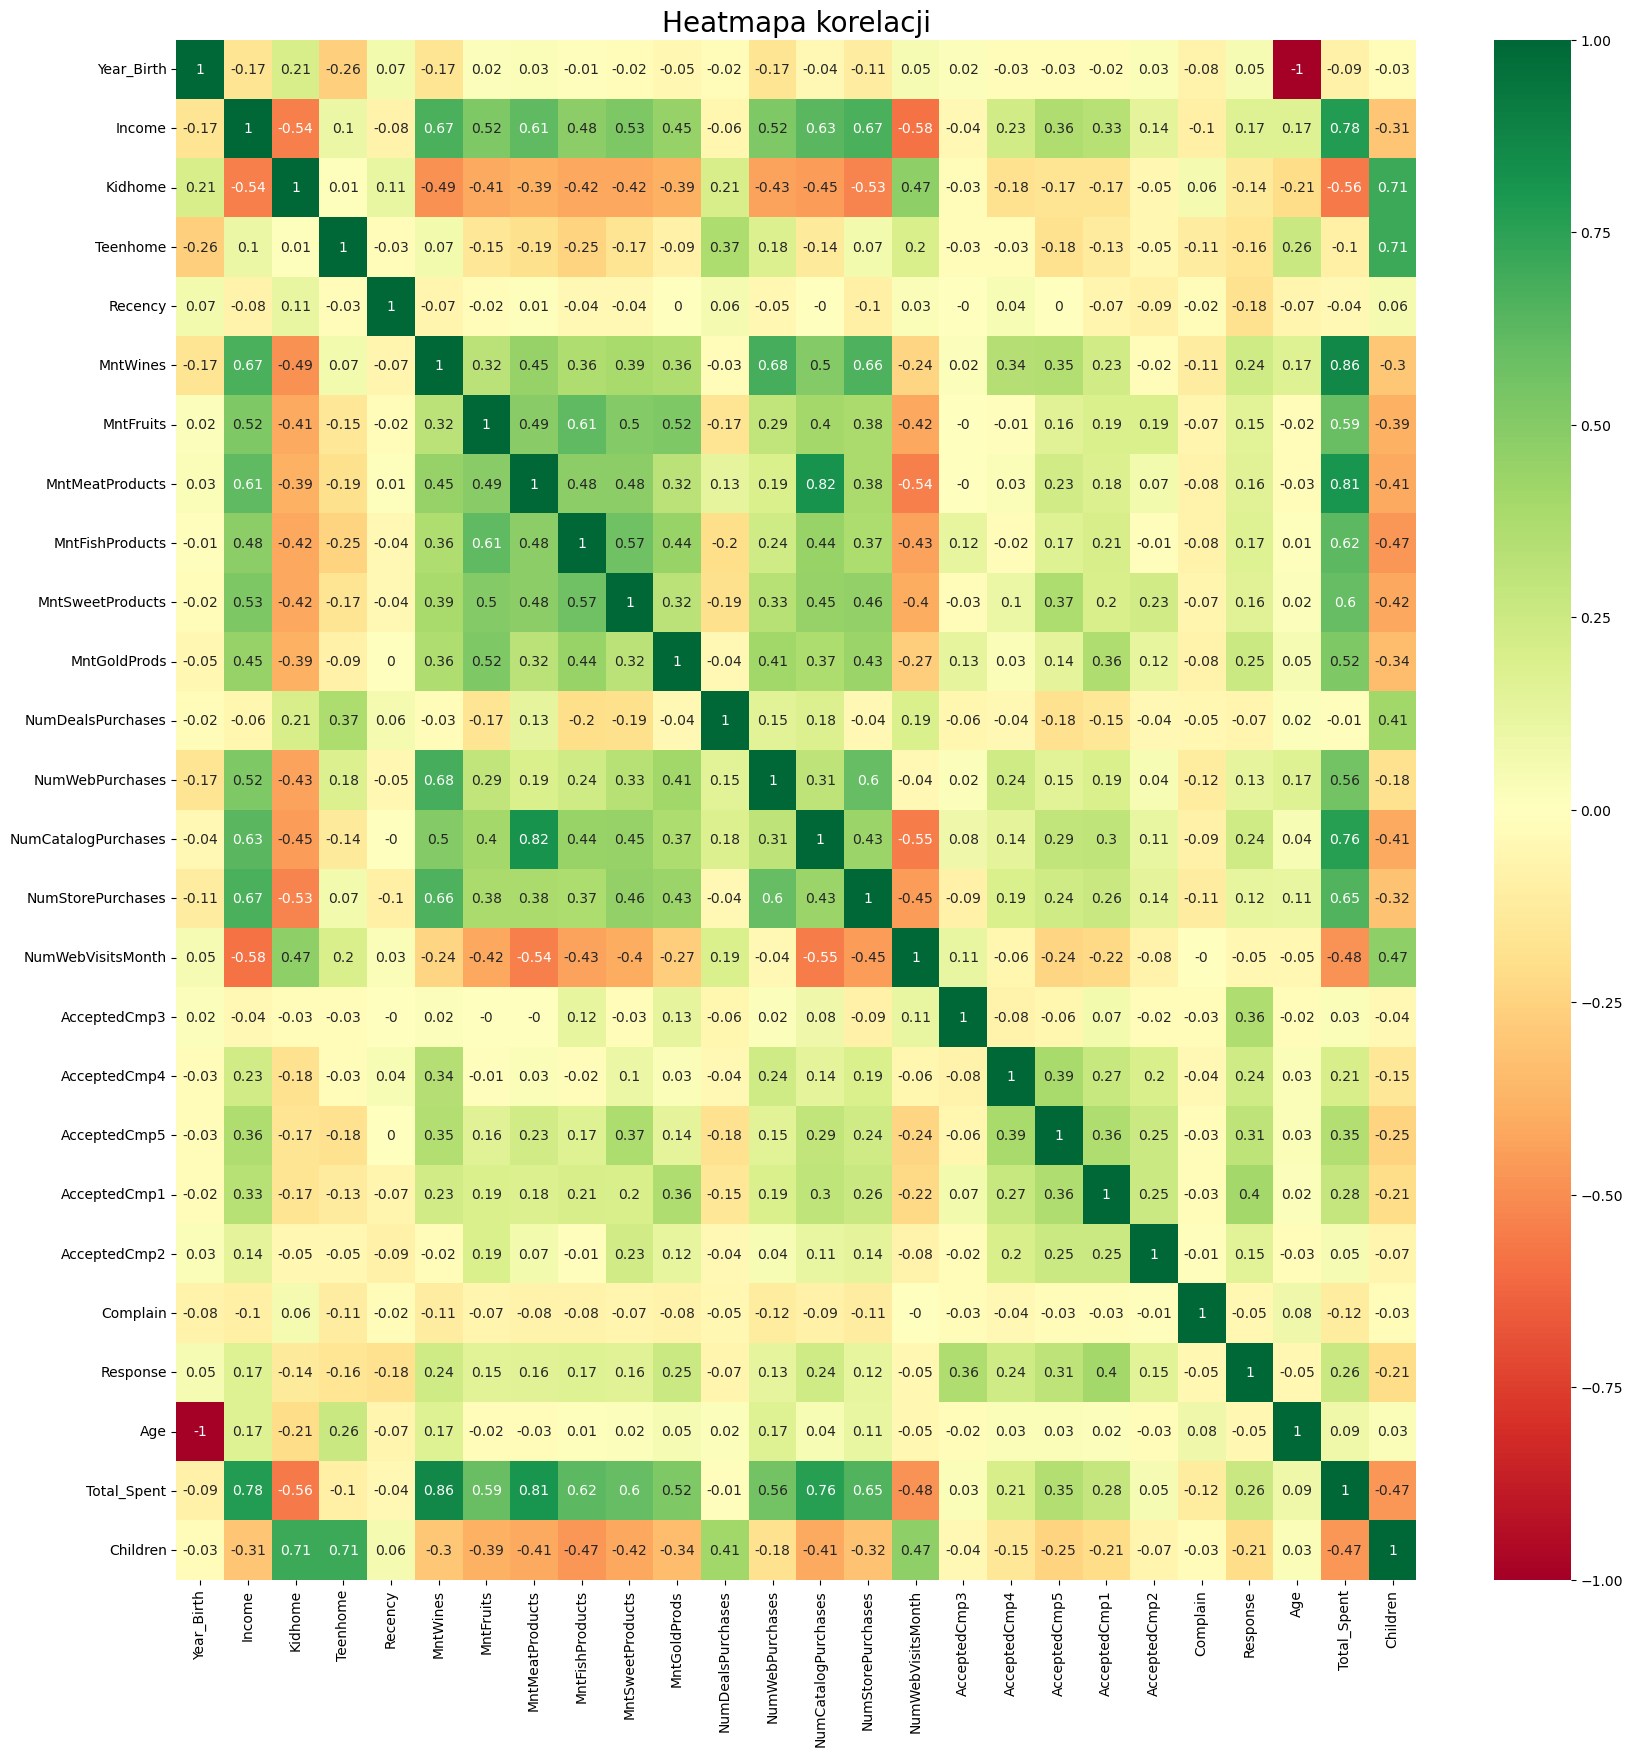

In [52]:
df_2 = pandas_df.drop(['proc_time', 'ID', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Income_Category'], axis=1)
correlation_matrix = df_2.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn')
plt.title('Heatmapa korelacji',fontsize = 20)
plt.show()

In [53]:
# Przygotowanie danych
X_Fruits = pandas_df[['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumCatalogPurchases', 'NumStorePurchases']]  # Przykładowe cechy
y_Fruits = pandas_df['MntFruits']  # Przykładowa zmienna celu

X_Sweets = pandas_df[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'NumCatalogPurchases', 'NumStorePurchases']]  # Przykładowe cechy
y_Sweets = pandas_df['MntSweetProducts']  # Przykładowa zmienna celu

X_Wines = pandas_df[['Income', 'Kidhome', 'MntMeatProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp5']]  # Przykładowe cechy
y_Wines = pandas_df['MntWines']  # Przykładowa zmienna celu

X_Fish = pandas_df[['MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'NumCatalogPurchases', 'NumStorePurchases']] 
y_Fish = pandas_df['MntFishProducts'] 

X_Meat = pandas_df[['Income','MntWines','MntFruits','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumWebVisitsMonth']] 
y_Meat = pandas_df['MntMeatProducts'] 

# Inicjalizacja modelu regresji liniowej
model_Fruits = LinearRegression()
model_Sweets = LinearRegression()
model_Wines = LinearRegression()
model_Fish = LinearRegression() 
model_Meat = LinearRegression()

# Dopasowanie modelu do danych
model_Fruits.fit(X_Fruits, y_Fruits)
model_Sweets.fit(X_Sweets, y_Sweets)
model_Wines.fit(X_Wines, y_Wines)
model_Fish.fit(X_Fish, y_Fish)
model_Meat.fit(X_Meat, y_Meat)

# Predykcja na podstawie nowych danych
new_data_Fruits = pd.DataFrame([[pandas_df['MntMeatProducts'].mean(), pandas_df['MntFishProducts'].mean(), pandas_df['MntSweetProducts'].mean(), pandas_df['NumCatalogPurchases'].mean(), pandas_df['NumStorePurchases'].mean()]], 
                        columns=['MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'NumCatalogPurchases', 'NumStorePurchases'])
prediction_Fruits = model_Fruits.predict(new_data_Fruits)

new_data_Sweets = pd.DataFrame([[pandas_df['MntFruits'].mean(), pandas_df['MntMeatProducts'].mean(), pandas_df['MntFishProducts'].mean(), pandas_df['NumCatalogPurchases'].mean(), pandas_df['NumStorePurchases'].mean()]], 
                        columns=['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'NumCatalogPurchases', 'NumStorePurchases'])
prediction_Sweets = model_Sweets.predict(new_data_Sweets)

new_data_Wines = pd.DataFrame([[pandas_df['Income'].mean(), pandas_df['Kidhome'].mean(), pandas_df['MntMeatProducts'].mean(), pandas_df['NumWebPurchases'].mean(), pandas_df['NumCatalogPurchases'].mean(), pandas_df['NumStorePurchases'].mean(), pandas_df['AcceptedCmp5'].mean()]], 
                        columns=['Income', 'Kidhome', 'MntMeatProducts', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp5'])
prediction_Wines = model_Wines.predict(new_data_Wines)

new_data_Fish = pd.DataFrame([[pandas_df['MntMeatProducts'].mean(), pandas_df['MntFruits'].mean(), pandas_df['MntSweetProducts'].mean(), pandas_df['NumCatalogPurchases'].mean(), pandas_df['NumStorePurchases'].mean()]], 
                              columns=['MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'NumCatalogPurchases', 'NumStorePurchases']) 
prediction_Fish = model_Fish.predict(new_data_Fish)

new_data_Meat = pd.DataFrame([[pandas_df['Income'].mean(), pandas_df['MntWines'].mean(), pandas_df['MntFruits'].mean(), pandas_df['MntFishProducts'].mean(), pandas_df['MntSweetProducts'].mean(),pandas_df['NumCatalogPurchases'].mean(),pandas_df['NumWebVisitsMonth'].mean()]], 
                        columns=['Income','MntWines','MntFruits','MntFishProducts','MntSweetProducts','NumCatalogPurchases','NumWebVisitsMonth'])
prediction_Meat = model_Meat.predict(new_data_Meat)

#print("Intercept:", model_Fruits.intercept_)
print("X_Fruits_Coefficients:", model_Fruits.coef_)
#print("Prediction:", prediction_Fruits)

#print("Intercept:", model_Sweets.intercept_)
print("X_Sweets_Coefficients:", model_Sweets.coef_)
#print("Prediction:", prediction_Sweets)

#print("Intercept:", model_Wines.intercept_)
print("X_Wines_Coefficients:", model_Wines.coef_)
#print("Prediction:", prediction_Wines)

#print("Intercept:", model_Fish.intercept_) 
print("X_Fish_Coefficients:", model_Fish.coef_) 
#print("Prediction:", prediction_Fish)

#print("Intercept:", model_Meat.intercept_)
print("X_Meat_Coefficients:", model_Meat.coef_)
#print("Prediction:", prediction_Meat)

# Tworzenie DataFrame z wynikami
results_Fruits = pd.DataFrame({'Feature': 'y_Fruits', 'Prediction': prediction_Fruits})
#results.loc[len(results_Fruits)] = ['Intercept', model_Fruits.intercept_]

# Wyświetlanie wyników w tabeli
table_Fruits = tabulate(results_Fruits, headers='keys', tablefmt='github', showindex=False)

print(table_Fruits)
print('')
print('')

# Tworzenie DataFrame z wynikami
results_Sweets = pd.DataFrame({'Feature': 'y_Sweets', 'Prediction': prediction_Sweets})
#results.loc[len(results_Sweets)] = ['Intercept', model_Sweets.intercept_]

# Wyświetlanie wyników w tabeli
table_Sweets = tabulate(results_Sweets, headers='keys', tablefmt='github', showindex=False)

print(table_Sweets)
print('')
print('')

# Tworzenie DataFrame z wynikami
results_Wines = pd.DataFrame({'Feature': 'y_Wines', 'Prediction': prediction_Wines})
#results.loc[len(results_Wines)] = ['Intercept', model_Wines.intercept_]

# Wyświetlanie wyników w tabeli
table_Wines = tabulate(results_Wines, headers='keys', tablefmt='github', showindex=False)

print(table_Wines)
print('')
print('')

# Tworzenie DataFrame z wynikami
results_Fish = pd.DataFrame({'Feature': 'y_Fish', 'Prediction': prediction_Fish})
#results.loc[len(results_Fish)] = ['Intercept', model_Fish.intercept_]

# Wyświetlanie wyników w tabeli
table_Fish = tabulate(results_Fish, headers='keys', tablefmt='github', showindex=False)

print(table_Fish)
print('')
print('')

# Tworzenie DataFrame z wynikami
results_Meat = pd.DataFrame({'Feature': 'y_Meat', 'Prediction': prediction_Meat})
#results.loc[len(results_Meat)] = ['Intercept', model_Meat.intercept_]

# Wyświetlanie wyników w tabeli
table_Meat = tabulate(results_Meat, headers='keys', tablefmt='github', showindex=False)

print(table_Meat)

X_Fruits_Coefficients: [ 0.04304013  0.28949786  0.13762871 -1.32293897  1.23108506]
X_Sweets_Coefficients: [0.14127481 0.02142223 0.22118835 0.54113149 2.67730335]
X_Wines_Coefficients: [ 2.38719592e-03 -1.64071158e+01  1.91748917e-01  4.95253480e+01
  1.33102303e+00  1.89049464e+01  1.90294479e+02]
X_Fish_Coefficients: [0.01784577 0.55780179 0.4151845  1.35261577 0.43505514]
X_Meat_Coefficients: [ 3.82819820e-04  1.69761727e-03  7.68967571e-01  1.55242607e-01
  3.04691545e-01  5.04318264e+01 -6.39664859e+00]
| Feature   |   Prediction |
|-----------|--------------|
| y_Fruits  |      24.7857 |


| Feature   |   Prediction |
|-----------|--------------|
| y_Sweets  |       26.312 |


| Feature   |   Prediction |
|-----------|--------------|
| y_Wines   |      289.252 |


| Feature   |   Prediction |
|-----------|--------------|
| y_Fish    |      38.2406 |


| Feature   |   Prediction |
|-----------|--------------|
| y_Meat    |      170.741 |


In [54]:
f = Figlet(font='big')
big_text = f.renderText('DZIEKUJEMY')
print(big_text)
print('Dominika Poręba')
print('Łukasz Wasilewicz')
print('Marcin Trybułowski')
print('Przemyslaw Murgrabia')
print('Zofia Ganczarek')

 _____ ___________ ______ _  ___    _      _ ______ __  ____     __
|  __ \___  /_   _|  ____| |/ / |  | |    | |  ____|  \/  \ \   / /
| |  | | / /  | | | |__  | ' /| |  | |    | | |__  | \  / |\ \_/ / 
| |  | |/ /   | | |  __| |  < | |  | |_   | |  __| | |\/| | \   /  
| |__| / /__ _| |_| |____| . \| |__| | |__| | |____| |  | |  | |   
|_____/_____|_____|______|_|\_\\____/ \____/|______|_|  |_|  |_|   
                                                                   
                                                                   

Dominika Poręba
Łukasz Wasilewicz
Marcin Trybułowski
Przemyslaw Murgrabia
Zofia Ganczarek
